## 02线性回归
___

In [3]:
# 导入需要的工具
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
# 定义超参数
input_size = 1 
output_size = 1
num_epochs = 60
learning_rate = 0.001


In [5]:
# 玩具数据集
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
print('x的形状',x_train.shape)
print('y的形状',y_train.shape)

x的形状 (15, 1)
y的形状 (15, 1)


In [6]:
# 线性回归模型的代码编写
model = nn.Linear(input_size,output_size)
# 定义损失和优化
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


In [7]:
# 训练模型
for epoch in range(num_epochs):
#     转换numpy成tensor
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
#     前向传播，此处还没有涉及反向传播
# 将数据喂给模型，实现预测
    outputs = model(inputs)
# 比较预测和实际，计算损失率
    loss = criterion(outputs,targets)
#     print('前向传播的损失率',loss)
#     现在进行反向传播，更新参数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#     每5个epoch便输出一次结果
    if (epoch+1)%5==0:
        print('Epoch[{}/{}],Loss:{:.4f}'.format(epoch+1,num_epochs,loss.item()))

Epoch[5/60],Loss:1.9137
Epoch[10/60],Loss:0.9309
Epoch[15/60],Loss:0.5326
Epoch[20/60],Loss:0.3711
Epoch[25/60],Loss:0.3055
Epoch[30/60],Loss:0.2788
Epoch[35/60],Loss:0.2678
Epoch[40/60],Loss:0.2633
Epoch[45/60],Loss:0.2613
Epoch[50/60],Loss:0.2603
Epoch[55/60],Loss:0.2598
Epoch[60/60],Loss:0.2595


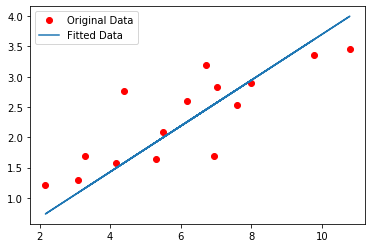

In [12]:
# 可视化
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.plot(x_train,predicted,label='Fitted Data')
plt.legend()
plt.show()

In [11]:
# 保存模型的参数
torch.save(model.state_dict(),'线性回归.ckpt')

## 上述代码讲解：
___


1. optimizer.zero_grad()<br>
注：Pytorch在反向传播中一定要手动将梯度清零，因为PyTorch默认会对梯度进行累加
2. optimizer.step()<br>
所有的optimizer都将取去运行step方法，这个方法将更新所有的参数，只要损失函数执行了 loss.backward()反向传播
3. predicted = model(torch.from_numpy(x_train)).detach().numpy()
    *model接收tensor类型的数据，因此需要将numpy转换成tensor
    *detach()方法返回相同数据的tensor，这样做的目的在于，我们不希望在可视化阶段为了拿到预测值，训练网络。其反向传播影响主网络的梯度。 便将其和主网络切断，
4. plt.legend() 执行后 ，会对图中数据附上中文名称

    